# EDA Practice in Pandas - Chris Gochis

In [1]:
# Import Packages and Modules
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#From Scikit Learn
from sklearn import preprocessing
from sklearn.model_selection  import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Read in AUTO.csv file into a data frame and call it Auto.

In [3]:
#Import csv into Pandas Dataset called Auto
Auto = pd.read_csv('AUTO.csv', sep = ",", encoding = 'ISO-8859-1')

In [4]:
#Check the dataset head
Auto.head()

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
0,Acura Integra,Front,31.0,Regular,13.2,172.0,101.0,67.0,39.0,"2,635",47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5
1,Acura TL,Front,22.0,Premium,17.1,193.0,108.0,70.0,40.0,"3,460",50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0
2,Buick Century,Front,22.0,Regular,17.5,195.0,109.0,73.0,40.0,"3,350",50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0
3,Buick LeSabre,Front,20.0,Regular,17.5,200.0,112.0,74.0,42.0,"3,640",51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5
4,Buick Park Avenue,Front,21.0,Regular,18.5,207.0,114.0,75.0,43.0,"3,880",51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0


In [5]:
#Check dataset tail
Auto.tail()

#It appears that the CVS was read in with rows 106-189 full of NaN. Let's remove these.

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Drop rows at bottom with no data
Auto = Auto.drop(Auto.index[106:190])

In [7]:
#Check Tail again
Auto.tail()

#NaN rows are gone!

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
101,Suzuki Vitara,Rear,19.0,Regular,17.4,165.0,98.0,70.0,37.0,"3,230",60.5,28.0,53.0,39.0,4.5,52.5,24.0,4.5
102,Chevrolet Tracker,Rear,21.0,Regular,17.4,163.0,98.0,67.0,37.0,"3,055",60.0,28.0,53.0,39.0,4.5,52.5,24.0,4.5
103,Ford Expedition,Rear,13.0,Regular,30.0,205.0,119.0,79.0,42.0,"5,290",69.5,70.0,63.5,42.0,5.5,63.5,33.5,5.5
104,Isuzu Rodeo,Rear,18.0,Regular,21.1,177.0,106.0,70.0,41.0,"3,935",60.0,39.5,56.0,41.0,4.0,56.0,30.0,3.5
105,Lincoln Navigator,Rear,13.0,Regular,30.0,205.0,119.0,80.0,44.0,"5,850",68.0,67.0,63.5,41.5,6.0,63.5,32.0,5.5


In [8]:
#Check Data Types of Columns
Auto.dtypes

Name                         object
Drive Type                   object
Mileage (mpg)               float64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)             float64
Wheel Base (inches)         float64
Width (inches)              float64
Turning Circle (feet)       float64
Weight (lbs)                 object
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

In [9]:
#Weight is shown as object
#Need to remove commas from Weight and convert to a float
Auto['Weight (lbs)']= Auto['Weight (lbs)'].str.replace(',','')
Auto['Weight (lbs)'] = Auto['Weight (lbs)'].astype(float)
Auto['Weight (lbs)']

0      2635.0
1      3460.0
2      3350.0
3      3640.0
4      3880.0
        ...  
101    3230.0
102    3055.0
103    5290.0
104    3935.0
105    5850.0
Name: Weight (lbs), Length: 106, dtype: float64

In [10]:
#Confirm type conversion worked
Auto.dtypes

#Sucess!

Name                         object
Drive Type                   object
Mileage (mpg)               float64
Fuel Type                    object
Capacity (gal)              float64
Length (inches)             float64
Wheel Base (inches)         float64
Width (inches)              float64
Turning Circle (feet)       float64
Weight (lbs)                float64
Door Top (inches)           float64
Luggage (cu. ft.)           float64
Front Shoulder (inches)     float64
Front Leg Room (inches)     float64
Front Head Room (inches)    float64
Rear Shoulder (inches)      float64
Rear Leg Room (inches)      float64
Rear Head Room (inches)     float64
dtype: object

## Replace any missing values with the median value of the variable (feature).

In [11]:
#Check to see if any columns have a NaN

Auto.isna().any()

#Luggage has NaN values.

Name                        False
Drive Type                  False
Mileage (mpg)               False
Fuel Type                   False
Capacity (gal)              False
Length (inches)             False
Wheel Base (inches)         False
Width (inches)              False
Turning Circle (feet)       False
Weight (lbs)                False
Door Top (inches)           False
Luggage (cu. ft.)            True
Front Shoulder (inches)     False
Front Leg Room (inches)     False
Front Head Room (inches)    False
Rear Shoulder (inches)      False
Rear Leg Room (inches)      False
Rear Head Room (inches)     False
dtype: bool

In [12]:
#Find Luggage values of NaN.
Auto[85:90]

#Rows 87 and 88 are NaN

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
85,Ford Crown Victoria,Rear,19.0,Regular,19.0,212.0,115.0,78.0,44.0,3985.0,52.0,21.0,61.0,42.0,5.0,60.0,29.5,4.0
86,Ford Explorer,Rear,16.0,Regular,21.0,191.0,112.0,70.0,40.0,4325.0,62.0,52.0,56.5,43.0,5.0,56.5,30.5,4.5
87,Ford F-150,Rear,15.0,Regular,25.0,226.0,139.0,80.0,49.0,5210.0,70.5,NaN,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18.0,Regular,20.0,202.0,126.0,70.0,45.0,3870.0,60.0,NaN,54.0,42.5,5.0,18.0,22.5,2.0
89,GMC Jimmy,Rear,15.0,Regular,18.0,184.0,107.0,68.0,46.0,4225.0,60.5,40.0,56.5,42.5,4.5,57.0,30.0,4.0


In [13]:
#Replace NaN with the Luggage median. 
#Code found here: https://thispointer.com/pandas-replace-nan-with-mean-or-average-in-dataframe-using-fillna/

Auto['Luggage (cu. ft.)'].fillna(value=Auto['Luggage (cu. ft.)'].median(), inplace=True)

In [14]:
#Check values were replaced
Auto[87:89]

#Success!

,Name,Drive Type,Mileage (mpg),Fuel Type,Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
87,Ford F-150,Rear,15.0,Regular,25.0,226.0,139.0,80.0,49.0,5210.0,70.5,16.0,63.5,42.0,7.0,60.0,24.5,2.5
88,Ford Ranger,Rear,18.0,Regular,20.0,202.0,126.0,70.0,45.0,3870.0,60.0,16.0,54.0,42.5,5.0,18.0,22.5,2.0


## Explore the general characteristics of the data.

In [15]:
#Describe the dataset
Auto.describe()

,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches)
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,21.292453,17.883019,187.594340,107.632075,70.915094,39.849057,3502.311321,53.891509,25.056604,56.471698,41.254717,4.287736,54.745283,28.363208,3.023585
std,3.769469,3.425714,12.493639,7.014713,3.237041,2.797252,633.453939,5.747465,18.235538,3.041640,1.021775,1.279784,7.110437,2.196895,1.370405
min,13.000000,12.100000,152.000000,93.000000,66.000000,34.000000,2420.000000,46.500000,10.000000,51.500000,39.000000,1.500000,6.500000,22.500000,0.000000
25%,19.000000,15.825000,178.000000,103.000000,68.000000,38.000000,3106.250000,50.000000,14.000000,54.000000,40.500000,3.500000,52.625000,27.000000,2.000000
50%,21.000000,17.400000,188.000000,107.000000,70.000000,40.000000,3395.000000,51.000000,16.000000,56.000000,41.000000,4.500000,56.000000,28.500000,3.000000
75%,23.000000,19.000000,195.000000,112.000000,73.000000,41.000000,3890.000000,60.000000,30.750000,58.500000,42.000000,5.000000,57.000000,30.000000,4.000000
max,31.000000,30.000000,226.000000,139.000000,80.000000,49.000000,5850.000000,70.500000,76.000000,63.500000,44.000000,8.000000,64.500000,34.000000,6.000000


In [16]:
#View the variable means
Auto.mean()

Mileage (mpg)                 21.292453
Capacity (gal)                17.883019
Length (inches)              187.594340
Wheel Base (inches)          107.632075
Width (inches)                70.915094
Turning Circle (feet)         39.849057
Weight (lbs)                3502.311321
Door Top (inches)             53.891509
Luggage (cu. ft.)             25.056604
Front Shoulder (inches)       56.471698
Front Leg Room (inches)       41.254717
Front Head Room (inches)       4.287736
Rear Shoulder (inches)        54.745283
Rear Leg Room (inches)        28.363208
Rear Head Room (inches)        3.023585
dtype: float64

In [17]:
#View the variable standard deviations
Auto.std()

Mileage (mpg)                 3.769469
Capacity (gal)                3.425714
Length (inches)              12.493639
Wheel Base (inches)           7.014713
Width (inches)                3.237041
Turning Circle (feet)         2.797252
Weight (lbs)                633.453939
Door Top (inches)             5.747465
Luggage (cu. ft.)            18.235538
Front Shoulder (inches)       3.041640
Front Leg Room (inches)       1.021775
Front Head Room (inches)      1.279784
Rear Shoulder (inches)        7.110437
Rear Leg Room (inches)        2.196895
Rear Head Room (inches)       1.370405
dtype: float64

In [18]:
#View distribution of Drive Type
Auto.groupby('Drive Type').size()

Drive Type
Front    81
Rear     25
dtype: int64

In [19]:
#View distributiuon of Fuel Type
Auto.groupby('Fuel Type').size()

Fuel Type
Premium     19
Regular     86
Regular      1
dtype: int64

In [20]:
#Noticing two 'Regular' fuel types. Going to clean out spaces
Auto['Fuel Type'] = Auto['Fuel Type'].str.replace(' ', '')

In [21]:
#Checking types...
Auto.groupby('Fuel Type').size()

#Fixed!

Fuel Type
Premium    19
Regular    87
dtype: int64

## Use z-score normalization to standardize the values of the Weight attribute.

In [22]:
#Transform Weight to Z Score, and compare side-by-side
Weight_Z=pd.DataFrame((Auto['Weight (lbs)']-Auto['Weight (lbs)'].mean())/Auto['Weight (lbs)'].std())
Weight_Z["Weight_Orig"] = Auto['Weight (lbs)']
Weight_Z.head()

,Weight (lbs),Weight_Orig
0,-1.369178,2635.0
1,-0.066795,3460.0
2,-0.240446,3350.0
3,0.217362,3640.0
4,0.596237,3880.0


## Convert the categorical variables into dummies.

In [23]:
#Store original categorical variables in own DF
data = [Auto["Fuel Type"], Auto["Drive Type"]]

headers = ["Fuel Type", "Drive Type"]

Fuel_Drive = pd.concat(data, axis=1, keys=headers)

Fuel_Drive.head()

,Fuel Type,Drive Type
0,Regular,Front
1,Premium,Front
2,Regular,Front
3,Regular,Front
4,Regular,Front


In [24]:
#Convert categorical variables into dummies
for col in Auto.columns[1:]:
	attName = col
	dType = Auto[col].dtype
	missing = pd.isnull(Auto[col]).any()
	uniqueCount = len(Auto[attName].value_counts(normalize=False))
	# discretize (create dummies)
	if dType == object:
		Auto = pd.concat([Auto, pd.get_dummies(Auto[col], prefix=col)], axis=1)
		del Auto[attName]

In [25]:
#Confirming Conversion
Auto.head()

,Name,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Drive Type_Front,Drive Type_Rear,Fuel Type_Premium,Fuel Type_Regular
0,Acura Integra,31.0,13.2,172.0,101.0,67.0,39.0,2635.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5,1,0,0,1
1,Acura TL,22.0,17.1,193.0,108.0,70.0,40.0,3460.0,50.0,14.0,56.0,40.5,2.5,55.0,27.0,2.0,1,0,1,0
2,Buick Century,22.0,17.5,195.0,109.0,73.0,40.0,3350.0,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0,1,0,0,1
3,Buick LeSabre,20.0,17.5,200.0,112.0,74.0,42.0,3640.0,51.0,18.0,59.5,40.5,5.0,58.0,27.5,4.5,1,0,0,1
4,Buick Park Avenue,21.0,18.5,207.0,114.0,75.0,43.0,3880.0,51.0,19.0,59.5,42.5,6.0,58.5,31.5,3.0,1,0,0,1


## Perform basic correlation analysis among the attributes.

                          Mileage (mpg)  Capacity (gal)  Length (inches)  \
Mileage (mpg)                  1.000000       -0.787515        -0.387151   
Capacity (gal)                -0.787515        1.000000         0.505427   
Length (inches)               -0.387151        0.505427         1.000000   
Wheel Base (inches)           -0.512751        0.660131         0.869492   
Width (inches)                -0.578650        0.678437         0.832541   
Turning Circle (feet)         -0.571132        0.526678         0.684696   
Weight (lbs)                  -0.875434        0.888074         0.550863   
Door Top (inches)             -0.771332        0.752458         0.117489   
Luggage (cu. ft.)             -0.619985        0.716461         0.240717   
Front Shoulder (inches)       -0.607314        0.722434         0.787516   
Front Leg Room (inches)        0.053420       -0.014806         0.268169   
Front Head Room (inches)      -0.236747        0.274185         0.203634   
Rear Shoulde

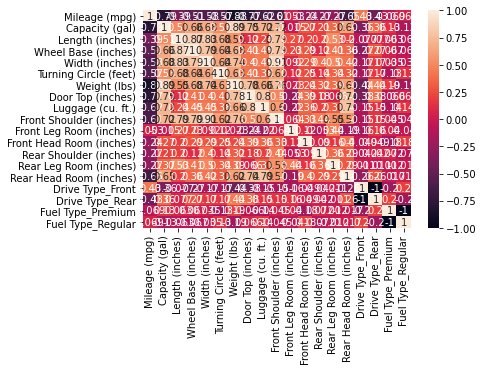

In [36]:
#Get numeric correlation matrix, numerical and visual

#import seaborn module
import seaborn as sn

corrMatrix = Auto.corr()
sn.heatmap(corrMatrix, annot=True)
print(corrMatrix)
plt.show()

## Perform a Principal Component Analysis with 3 components.

In [27]:
#import PCA
from sklearn.decomposition import PCA

#convert dataframe values to array
X = Auto.iloc[:,1:].values

In [28]:
#Run PCA
pca = PCA(n_components=3)
pca.fit(X)

#View Variance
print(pca.explained_variance_ratio_)

[9.98979113e-01 5.16171984e-04 3.14170638e-04]


## Create a scatter plot.

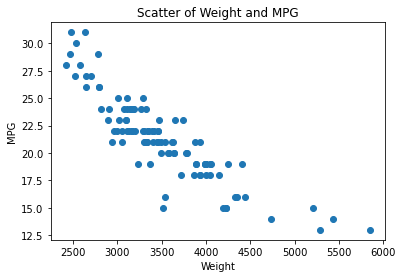

In [29]:
#Create a scatter plot
plt.scatter(Auto['Weight (lbs)'],Auto['Mileage (mpg)'])
plt.title('Scatter of Weight and MPG')
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.show()

## Create histograms.

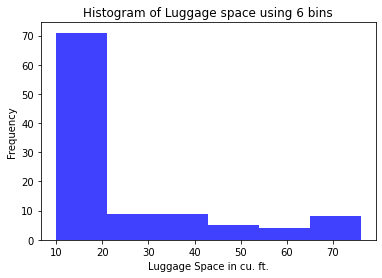

In [30]:
#Create histogram for Luggage with 6 bins
n, bins, patches = plt.hist(Auto['Luggage (cu. ft.)'], 6, facecolor='blue', alpha=0.75)
plt.xlabel("Luggage Space in cu. ft.")
plt.ylabel("Frequency")
plt.title('Histogram of Luggage space using 6 bins')
plt.show()

<AxesSubplot:xlabel='Mileage (mpg)', ylabel='Count'>

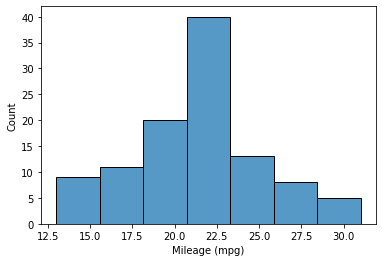

In [31]:
#Create histogram for MPG with 7 bins (using seaborn)
import seaborn as sns

sns.histplot(data=Auto['Mileage (mpg)'], bins=7)

## Perform a cross-tabulation of the two "fuel type" variables versus the two "Drive type" variables.

In [32]:
#Create Crosstab of Fuel Type vs Drive Type using categorical dataframe stored earlier as Fuel_Drive
fuel_drive_cross=pd.crosstab(Fuel_Drive['Fuel Type'], Fuel_Drive['Drive Type'],colnames=['Drive Type'],rownames=['Fuel Type'])
print(fuel_drive_cross)

Drive Type  Front  Rear
Fuel Type              
Premium        11     8
Regular        70    17


Text(0.5, 1.0, 'Drive Type by Fuel Type')

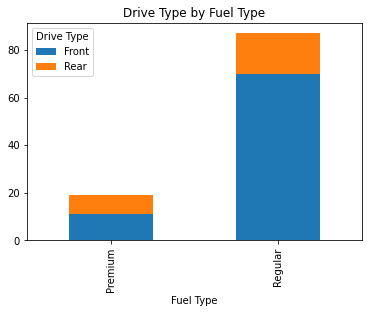

In [33]:
#Create bar chart to visualize the Crosstab
#bar chart of Genre by Gender
fuel_drive_cross.plot(kind='bar', stacked=True)
plt.title('Drive Type by Fuel Type')

## Create dataframe where Fuel Type is regular and MPG is > 21

In [34]:
#Create dataframe where Fuel Type is regular and MPG is > 21
Auto_sub=Auto.query('`Fuel Type_Regular` == 1 & `Mileage (mpg)` > 21') 
Auto_sub.head()

,Name,Mileage (mpg),Capacity (gal),Length (inches),Wheel Base (inches),Width (inches),Turning Circle (feet),Weight (lbs),Door Top (inches),Luggage (cu. ft.),Front Shoulder (inches),Front Leg Room (inches),Front Head Room (inches),Rear Shoulder (inches),Rear Leg Room (inches),Rear Head Room (inches),Drive Type_Front,Drive Type_Rear,Fuel Type_Premium,Fuel Type_Regular
0,Acura Integra,31.0,13.2,172.0,101.0,67.0,39.0,2635.0,47.5,13.0,51.5,41.5,2.0,46.5,25.0,0.5,1,0,0,1
2,Buick Century,22.0,17.5,195.0,109.0,73.0,40.0,3350.0,50.5,17.0,58.0,44.0,5.0,57.0,30.0,2.0,1,0,0,1
6,Chevrolet Cavalier,26.0,15.2,181.0,104.0,68.0,38.0,2795.0,50.5,14.0,54.5,41.5,4.5,53.5,28.0,2.0,1,0,0,1
8,Chevrolet Lumina,22.0,16.6,201.0,108.0,73.0,44.0,3350.0,51.0,16.0,58.5,42.5,4.5,57.0,30.0,2.0,1,0,0,1
9,Chevrolet Malibu,24.0,15.2,190.0,107.0,69.0,40.0,3075.0,50.5,17.0,55.0,43.0,4.5,54.0,30.5,2.0,1,0,0,1
